# 实验六 常见分类算法


## 实验目的

通过本实验让学生了解决策树、随机森林和支持向量机的基本原理，能使用sklearn库建立相关分类模型解决分类问题。

## 实验要求：


（1）编码规范
（2）代码高效
（3）注释充分，程序可读性好
（4）程序无bug
（5）方法接口规范定义

## 实验内容

使用不同的决策树模型对鸢尾花进行分类，并可视化分类结果；使用决策树、随机森林和SVM分类器对手写数字进行分类识别并进行分类性能评估和可视化


## 实验步骤

### 决策树与随机森林

In [1]:
#导入第三方库
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#### 1.1 数据集读取

In [2]:
# 加载数据
data = load_iris()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target

#### 1.2数据预处理

In [3]:
# 数据预处理
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df[data.feature_names],df['target'],random_state=0)


#### 1.3模型构建

In [4]:
# 建立决策树模型
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier()


#### 1.4模型训练

In [5]:
# 训练和测试
tree1.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### 1.5 模型性能评估

In [6]:
# 模型评估
score = tree1.score(X_test,Y_test)
print("score:",score)

# 分类报告
from sklearn.metrics import classification_report
pred = tree1.predict(X_test)
print(classification_report(Y_test,pred))

score: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### 1.6.模型可视化

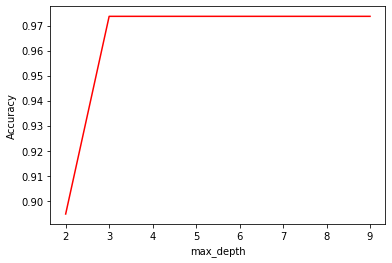

随机森林分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [7]:
# 决策树的可视化

# from sklearn import tree
# import graphviz
# dot_data = tree.export_graphviz(tree1, out_file=None)
# graph = graphviz.Source(dot_data)
# graph.render(r'123.pdf')

acc = [] # 存放不同深度树的评估性能
for depth in range(2,10):
    tree = DecisionTreeClassifier(max_depth=depth,random_state=0,)
    tree.fit(X_train,Y_train)
    score = tree.score(X_test,Y_test)
    acc.append(score)
# 参数可视化
plt.plot(range(2,10),acc,color='red')
# plt.plot(range(2,10),acc)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()


# 随机森林
from sklearn.ensemble import RandomForestClassifier
forrest1 = RandomForestClassifier(n_estimators=50,random_state=1,min_samples_leaf=2)
forrest1.fit(X_train,Y_train)
pred1 = forrest1.predict(X_test)
print(("随机森林分类报告："))
print(classification_report(Y_test,pred1))

## 实验总结

In [ ]:
#总结